# Data Analysis - Instakart

Before carrying out MCA and MBA on the given dataset, we can study the given dataset, its attributes and summarize the dataset for a better understanding.

In [1]:
#imports
import pandas as pd #Python data analysis library
import numpy as np #Python scientific computing
import matplotlib.pyplot as plt #For plotting
import matplotlib.mlab as mlab
import seaborn as sns #Python visualization library
from scipy.optimize import curve_fit
from IPython.display import display, HTML

#Plots inline
%matplotlib inline

Citation - “The Instacart Online Grocery Shopping Dataset 2017”, Accessed from https://www.instacart.com/datasets/grocery-shopping-2017"

In [2]:
#import dataset
trainDf = pd.read_csv("../data/raw/order_products__train.csv")
orderDf = pd.read_csv("../data/raw/orders.csv")
depDf = pd.read_csv("../data/raw/departments.csv")
aisleDf = pd.read_csv("../data/raw/aisles.csv")
productDf = pd.read_csv("../data/raw/products.csv")

In [3]:
orderDf.shape

(3421083, 7)

There are 3421083 orders, roughly 35 lakh orders

In [4]:
productDf.shape

(49688, 4)

There are 49688 products, roughly 50000 products

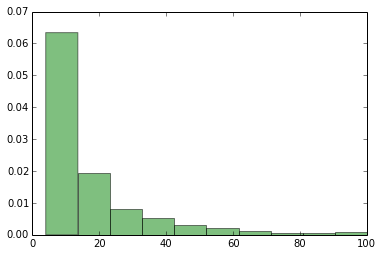

In [17]:
#get distribution of number of orders per customer
customerNumOrderFrame = orderDf.groupby("user_id",as_index = False)["order_number"].max()
num_bins = 10
n, bins, patches = plt.hist(customerNumOrderFrame["order_number"] , num_bins, normed=1, facecolor='green', alpha=0.5)
mu = customerNumOrderFrame["order_number"].mean()
sigma = customerNumOrderFrame["order_number"].std()


Looking at the histogram it seems to be skewed and appropriate distribution will be an exponential function.

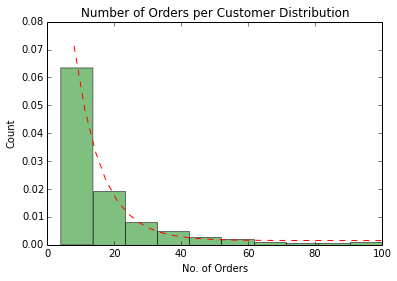

In [21]:
n, bins, patches = plt.hist(customerNumOrderFrame["order_number"] , num_bins, normed=1, facecolor='green', alpha=0.5)

bins = np.delete(bins,10) #to make dimensions of x & y axis values equal
bins = bins+5 #to ge the central value of each bar

def exponenial_func(x, a, b, c):
    return a*np.exp(-b*x)+c

popt, pcov = curve_fit(exponenial_func, bins, n, p0=(1, 1e-6, 1))

xx = np.linspace(8, 100, 30)
yy = exponenial_func(xx, *popt)

plt.plot(xx, yy ,'r--')
plt.xlabel("No. of Orders")
plt.ylabel("Count")
plt.title("Number of Orders per Customer Distribution")

Now to find the top frequently purchased products we will merge the prior and train dataset to get the complete order dataset. We will use append() for doing so.

In [6]:
priorDf = pd.read_csv("../data/raw/order_products__prior.csv")
trainDf = trainDf.append(priorDf,ignore_index = True)
#Now a product count data frame can be created by counting the order_id for each product_id
productCountDf = trainDf.groupby("product_id",as_index = False)["order_id"].count()

In [7]:
productCountDf.shape

(49685, 2)

In [43]:
#Top 20 most frequently purchased products
topLev = 20

#Here order_id is the count so we need to sort the data frame w.r.t order_id
productCountDf = productCountDf.sort_values("order_id",ascending = False)

topProdFrame = productCountDf.iloc[0:topLev,:]
topProdFrame = topProdFrame.merge(productDf,on = "product_id")

display(topProdFrame.loc[:,["product_name"]])

,product_name
0,Banana
1,Bag of Organic Bananas
2,Organic Strawberries
3,Organic Baby Spinach
4,Organic Hass Avocado
5,Organic Avocado
6,Large Lemon
7,Strawberries
8,Limes
9,Organic Whole Milk
